# Diabetes Prediction - Full ML Pipeline for Colab Dataset: Diabetes Prediction Dataset (Kaggle)

# Section 1: Problem Type Identification


In [13]:
print("This is a Supervised Learning - Binary Classification problem.")
print("Target variable: diabetes (0 = Non-Diabetic, 1 = Diabetic)")


This is a Supervised Learning - Binary Classification problem.
Target variable: diabetes (0 = Non-Diabetic, 1 = Diabetic)


Section 2: Importing Libraries


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, roc_curve)
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


# Section 3: Dataset Loading


In [15]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Section 4: Algorithm Theoretical Explanations


In [ ]:
print("\nAlgorithm Theories:")
print("\n1. Logistic Regression: A linear model for binary classification, estimating probabilities using the sigmoid function. Strengths: Fast, interpretable. Weakness: Can't handle non-linear relationships well.")
print("\n2. Decision Tree: Splits data recursively using feature thresholds. Strengths: Easy to interpret. Weakness: Prone to overfitting.")
print("\n3. Random Forest: An ensemble of Decision Trees trained on random subsets. Strengths: Reduces overfitting, good accuracy. Weakness: Less interpretable.")
print("\n4. SVM: Maximizes margin between classes using hyperplanes. Strengths: Effective for high-dimensional space. Weakness: Slow on large datasets.")
print("\n5. Neural Network: Layers of interconnected nodes that capture complex patterns. Strengths: Handles non-linear relationships. Weakness: Requires more data and tuning.")


Section 5: Data Preprocessing


In [ ]:
# Label Encoding for 'gender'
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

# One-hot Encoding for 'smoking_history'
df = pd.get_dummies(df, columns=['smoking_history'])

# Features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Section 6: Model Training and Evaluation


In [18]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    'SVM': SVC(probability=True, class_weight='balanced'),
    'Neural Network': MLPClassifier(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train) if name in ['Logistic Regression', 'SVM', 'Neural Network'] else model.fit(X_train, y_train)
    X_eval = X_test_scaled if name in ['Logistic Regression', 'SVM', 'Neural Network'] else X_test
    y_pred = model.predict(X_eval)
    y_proba = model.predict_proba(X_eval)[:,1]
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }

pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1,AUC
Logistic Regression,0.88890,0.426685,0.893529,0.577567,0.962945
Decision Tree,0.89825,0.451209,0.911176,0.603546,0.973756
Random Forest,0.96935,0.933759,0.688235,0.792414,0.965707
SVM,0.89625,0.446105,0.912941,0.599344,0.963770
Neural Network,0.97210,0.968033,0.694706,0.808904,0.977083


Section 7: Cross Validation (5-Fold)


In [9]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("\n5-Fold CV F1 Scores:")
for name, model in models.items():
    X_cv = X_train_scaled if name in ['Logistic Regression', 'SVM', 'Neural Network'] else X_train
    scores = cross_val_score(model, X_cv, y_train, cv=cv, scoring='f1')
    print(f"{name}: Mean F1={scores.mean():.3f}, Std={scores.std():.3f}")



5-Fold CV F1 Scores:
Logistic Regression: Mean F1=0.570, Std=0.010
Decision Tree: Mean F1=0.601, Std=0.005
Random Forest: Mean F1=0.795, Std=0.007
SVM: Mean F1=0.592, Std=0.009
Neural Network: Mean F1=0.803, Std=0.009


Section 8: Learning Curve Plot


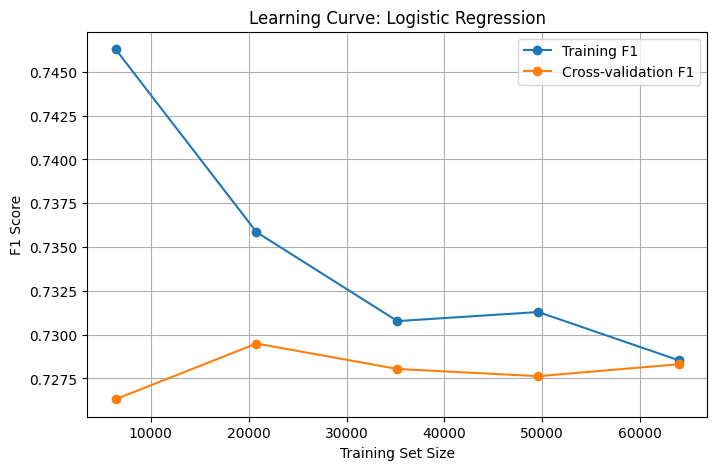

In [10]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 5))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', label='Training F1')
    plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation F1')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(LogisticRegression(max_iter=1000), X_train_scaled, y_train, "Learning Curve: Logistic Regression")


Section 9: Confusion Matrix Heatmap & ROC Curve


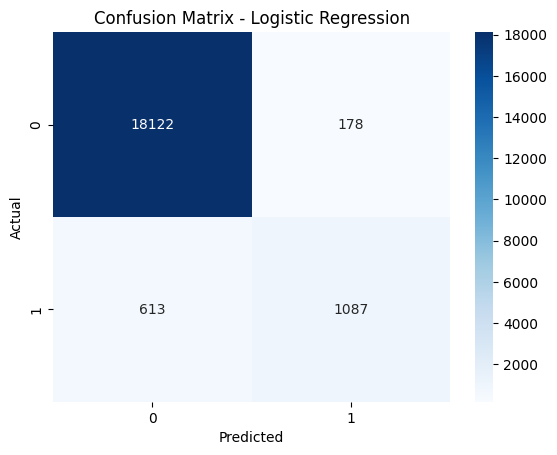

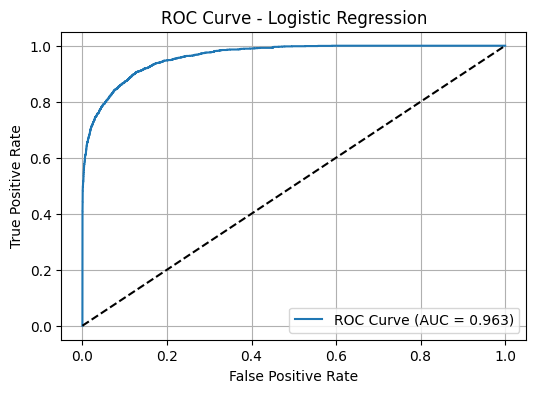

In [11]:
best_model = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
y_best_pred = best_model.predict(X_test_scaled)
y_best_proba = best_model.predict_proba(X_test_scaled)[:,1]

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_best_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.3f)' % roc_auc_score(y_test, y_best_proba))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Section 10: Trade-off Analysis


In [12]:
print("\nTrade-off Summary:")
print("- Logistic Regression: High interpretability, fast, but limited non-linear handling.")
print("- Decision Tree: Easy to explain but overfits easily.")
print("- Random Forest: Balanced performance but slower.")
print("- SVM: Accurate but computationally expensive.")
print("- Neural Network: Best for complex patterns but needs more data and tuning.")


Trade-off Summary:
- Logistic Regression: High interpretability, fast, but limited non-linear handling.
- Decision Tree: Easy to explain but overfits easily.
- Random Forest: Balanced performance but slower.
- SVM: Accurate but computationally expensive.
- Neural Network: Best for complex patterns but needs more data and tuning.
